In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, LabelBinarizer, OneHotEncoder, MinMaxScaler

# pour éviter les warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Transformer

In [2]:
X = np.array(['Chat', 'Chien', 'Chat', 'Oiseau'])

In [3]:
# fit(X_train) : développe une fonction de transformation à partir de X_train
transformer = LabelEncoder()
transformer.fit(X)

LabelEncoder()

In [4]:
transformer.transform(X)

array([0, 1, 0, 2])

In [5]:
transformer.fit_transform(X)

array([0, 1, 0, 2], dtype=int64)

# 1- Encodage

### LabelEncoder : ne marche que pour une seule variable (colonne).

In [6]:
y = np.array(['Chat', 'Chien', 'Chat', 'Oiseau'])

In [7]:
encoder = LabelEncoder()
encoder.fit(y)

LabelEncoder()

In [8]:
encoder.classes_

array(['Chat', 'Chien', 'Oiseau'], dtype='<U6')

In [9]:
encoder.transform(y)

array([0, 1, 0, 2])

In [10]:
# Pour aller plus vite
encoder.fit_transform(y)

array([0, 1, 0, 2], dtype=int64)

In [11]:
# Pour voir à quoi correspond chaque valeur numérique, décoder les données.
encoder.inverse_transform(np.array([0, 0, 2, 2]))

array(['Chat', 'Chat', 'Oiseau', 'Oiseau'], dtype='<U6')

### Ordinal Encoder : peut prendre plusieurs variables.

In [13]:
X = np.array([['Chat', 'Poils'],
             ['Chien', 'Poils'],
             ['Chat', 'Poils'],
             ['oiseau', 'Plumes']])

In [16]:
encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

### Label Binarizer : encodage en One-hot, via binaire.

In [18]:
y = np.array(['chat', 'chien', 'chat', 'oiseau'])

In [19]:
encoder = LabelBinarizer()
encoder.fit_transform(y)

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

### One-Hot Encoder

In [ ]:
X = np.array([['Chat', 'Poils'],
             ['Chien', 'Poils'],
             ['Chat', 'Poils'],
             ['oiseau', 'Plumes']])

In [21]:
encoder = OneHotEncoder()
encoder.fit_transform(X)

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

# 2- Normalisation

In [23]:
X = np.array([[70],
             [80],
             [120]])

### MinMaxScaler

In [24]:
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

In [26]:
from sklearn.datasets import load_iris

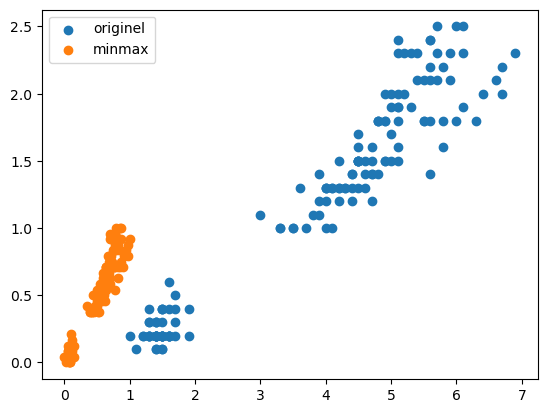

In [30]:
iris = load_iris()

X = iris.data

X_minmax = MinMaxScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], label = 'originel')
plt.scatter(X_minmax[:, 2], X_minmax[:, 3], label = 'minmax')
plt.legend()
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler, RobustScaler

### StandardScaler

In [32]:
X = np.array([[70],
             [80],
             [120]])

In [33]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

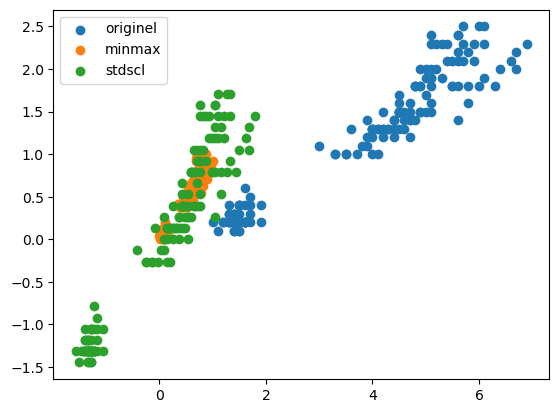

In [38]:
iris = load_iris()

X = iris.data

X_minmax = MinMaxScaler().fit_transform(X)
X_stdscl = StandardScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], label = 'originel')
plt.scatter(X_minmax[:, 2], X_minmax[:, 3], label = 'minmax')
plt.scatter(X_stdscl[:, 2], X_stdscl[:, 3], label = 'stdscl')
plt.legend()
plt.show()

### RobustScaler: transforme chaque variable X en étant peu sensible aux outliers.

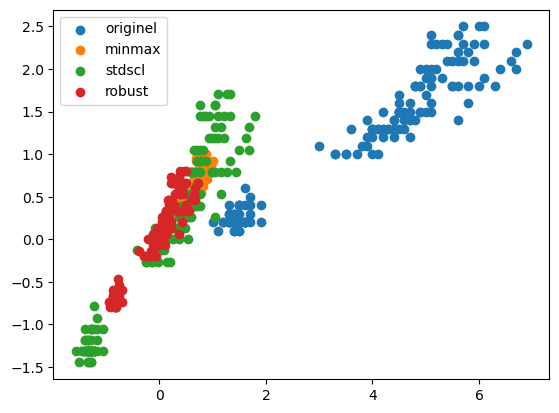

In [39]:
iris = load_iris()

X = iris.data

X_minmax = MinMaxScaler().fit_transform(X)
X_stdscl = StandardScaler().fit_transform(X)
X_robust = RobustScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], label = 'originel')
plt.scatter(X_minmax[:, 2], X_minmax[:, 3], label = 'minmax')
plt.scatter(X_stdscl[:, 2], X_stdscl[:, 3], label = 'stdscl')
plt.scatter(X_robust[:, 2], X_robust[:, 3], label = 'robust')
plt.legend()
plt.show()

### PolyFeatures: créer de nouvelles variables à partir des variables existantes.

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
X = np.array([[1],
             [2],
             [0.5]])

In [42]:
PolynomialFeatures(3).fit_transform(X)

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

# SKLearn Pipeline : Application.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris

In [45]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [46]:
# Transformer

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)

In [47]:
# Estimator

model = SGDClassifier(random_state = 0)
model.fit(X_train_transformed, y_train)

SGDClassifier(random_state=0)

In [48]:
# Test

X_test_transformed = scaler.transform(X_test)
model.predict(X_test_transformed)

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

# Pipeline

In [49]:
from sklearn.pipeline import make_pipeline

In [51]:
model = make_pipeline(StandardScaler(), SGDClassifier())

model.fit(X_train, y_train)

model.predict(X_test)

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 1, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [52]:
model.score(X_test, y_test)

0.8666666666666667

#### GridSearchCV

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
model = make_pipeline(PolynomialFeatures(), StandardScaler(), SGDClassifier(random_state = 0))
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])

In [56]:
params = {
    'polynomialfeatures__degree' : [2, 3, 4],
    'sgdclassifier__penalty' : ['l1', 'l2']
}

grid = GridSearchCV(model, param_grid = params, cv = 4)

grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [57]:
grid.best_params_

{'polynomialfeatures__degree': 4, 'sgdclassifier__penalty': 'l2'}

In [58]:
grid.score(X_test, y_test)

0.9666666666666667

# 3- Imputation

### SimpleImputer

In [59]:
from sklearn.impute import SimpleImputer

In [60]:
X = np.array([[10, 3],
             [0, 4],
             [5, 3],
             [np.nan, 3]])

In [61]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit_transform(X)

array([[10.,  3.],
       [ 0.,  4.],
       [ 5.,  3.],
       [ 5.,  3.]])

In [66]:
X_test = np.array([[12, 5],
             [40, 2],
             [5, 5],
             [np.nan, np.nan]])

In [67]:
imputer.transform(X_test)

array([[12.,  5.],
       [40.,  2.],
       [ 5.,  5.],
       [19.,  4.]])

### KNNImputer

In [69]:
from sklearn.impute import KNNImputer

In [70]:
X = np.array([[1, 100],
             [2, 30],
             [3, 15],
             [np.nan, 20]])

In [71]:
imputer = KNNImputer(n_neighbors = 1)
imputer.fit_transform(X)

array([[  1., 100.],
       [  2.,  30.],
       [  3.,  15.],
       [  3.,  20.]])

### MissingIndicator

In [76]:
from sklearn.impute import MissingIndicator
from sklearn.pipeline import make_union

In [73]:
X = np.array([[1, 100],
             [2, 30],
             [3, 15],
             [np.nan, np.nan]])

In [74]:
MissingIndicator().fit_transform(X)

array([[False, False],
       [False, False],
       [False, False],
       [ True,  True]])

In [77]:
pipeline = make_union(SimpleImputer(strategy = 'constant', fill_value = -99), MissingIndicator())
pipeline.fit_transform(X)

array([[  1., 100.,   0.,   0.],
       [  2.,  30.,   0.,   0.],
       [  3.,  15.,   0.,   0.],
       [-99., -99.,   1.,   1.]])

## Application

In [78]:
titanic = sns.load_dataset('titanic')
y = titanic['survived']
X = titanic[['pclass', 'age']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [79]:
model = make_pipeline(KNNImputer(), SGDClassifier())

In [80]:
params = {
    'knnimputer__n_neighbors' : [1, 2, 3, 4]
}

In [81]:
grid = GridSearchCV(model, param_grid = params, cv = 5)

In [82]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('sgdclassifier', SGDClassifier())]),
             param_grid={'knnimputer__n_neighbors': [1, 2, 3, 4]})

In [83]:
grid.best_params_

{'knnimputer__n_neighbors': 3}

# 4- Feature Selection

### VarianceThreshold : élimine les variables dont la variance est inférieure à un certain seuil.

In [84]:
from sklearn.feature_selection import VarianceThreshold

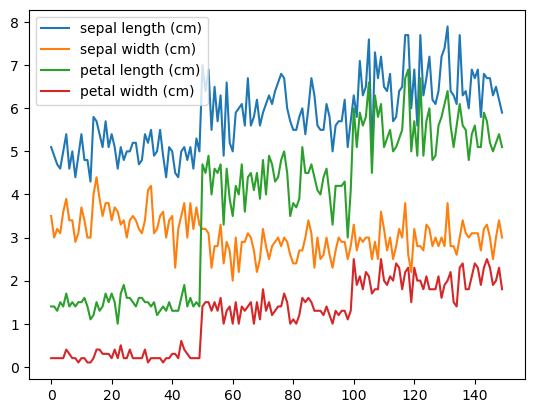

In [85]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

plt.plot(X)
plt.legend(iris.feature_names)

In [86]:
X.var(axis = 0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [88]:
selector = VarianceThreshold(threshold = 0.2)
selector.fit_transform(X)
selector.get_support()

array([ True, False,  True,  True])

In [90]:
np.array(iris.feature_names)[selector.get_support()]

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

### SelectKBest : sélectionne les K variables X dont le score du test de dépendance avec y est plus élévé.

In [91]:
from sklearn.feature_selection import SelectKBest, chi2

In [92]:
chi2(X, y)

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [94]:
selector = SelectKBest(chi2, k = 1)
selector.fit_transform(X, y)

selector.get_support() # méthode utilisée pour voir les variables dont il s'agit dans la sélection

array([False, False,  True, False])

### SelectFromModel : entraine un estimateur puis sélectionne les variables les plus importantes pour cet estimateur.

In [95]:
from sklearn.feature_selection import SelectFromModel

In [98]:
selector = SelectFromModel(SGDClassifier(random_state = 0), threshold = 'mean')
selector.fit_transform(X, y)

selector.get_support()

selector.estimator_.coef_

array([[  8.64029104,  27.2851296 , -40.01819009, -17.73533424],
       [ -5.48888269, -58.79616709,  22.88584985, -54.14457159],
       [-81.28026953, -75.17372078, 130.76437145, 131.39608339]])

### Recursive Feature Selection (RFE + RFECV) : sélectionner des variables de façon récursive.

In [99]:
from sklearn.feature_selection import RFE, RFECV

In [100]:
selector = RFECV(SGDClassifier(), step = 1, min_features_to_select = 2, cv = 5) 
# step = nombre de variables à éliminer à chaque itération
# min_features_to_select = combien de variables à avoir à la fin de l'algo

In [103]:
selector.fit(X, y)
selector.ranking_

array([3, 1, 2, 1])